In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

**Name: Anshul Doshi (ad3222)**

# HW 1 - Forms of Error

## Question 1

Find the absolute error, relative error, and decimal precision (number of significant decimal digits) for the following $f$ and approximations $\hat{f}$.  Note that here we may also mean precision as compared to $f$.  In these cases use the absolute error to help define $\hat{f}$'s precision (each worth 5 points).

**(a)** $f = \pi$ and $\hat{f} = 3.14$

**(b)** $f = \pi$ and $\hat{f} = 22 / 7$

**(c)** $f = \log (n!)$ and $\hat{f} = n~log(n) - n$ for $n = 5, ~~ 10, ~~ 100$ (Stirling's approximation)

**(d)** $f = e^x$ and $\hat{f} = T_n(x)$ where $T_n(x)$ is the Taylor polynomial approximation to $e^x$ expanded about $x = 0$.  Consider $N = 1, 2, 3$.  What vaule of $N$ is required for this approximation to be good to 6 digits of decimal precision?

In [2]:
import sympy

def get_error(true_val, approx_val):
    f_hat = approx_val
    f = true_val

    abs_error = abs(f - f_hat)
    rel_error = abs_error / f

    #decimal percision
    p = numpy.round(-numpy.log10(numpy.abs(rel_error)))    
    print "decimal precision p is:" , p

    n = numpy.floor(numpy.log10(abs_error))+1.0-4
    abs_error = round(10.0**-n*abs_error)*10.0**n
    rel_error = round(10.0**-n*rel_error)*10.0**n
    return [p, abs_error,rel_error]

#part a
print "Part A Solution\n"
print get_error(numpy.pi,3.14)
print '\n' 

#part b
print "Part B Solution\n"
print get_error(numpy.pi,22.0/7.0)
print '\n' 

#part c
print "Part C Solution\n"
N = [5,10,100]
for n in N:
    print get_error(numpy.log(float(numpy.math.factorial(n))),(n*numpy.log(n)) - n)
print '\n' 

#part d
print "Part D Solution\n"
T_n = 0
for n in xrange(0,15):
    #p = sympy.mpmath.taylor(sympy.exp, 0.0, n)
    #approx = sympy.mpmath.polyval(p[::-1], 1.0)
    T_n += (1.0 / numpy.math.factorial(n))
    print 'approx is ' , T_n
    print get_error(numpy.exp(1.0), T_n)
    if get_error(numpy.exp(1.0), T_n)[0] == 6.0:
        print " Solution --> N =", n 
        break
    

Part A Solution

decimal precision p is: 3.0
[3.0, 0.001593, 0.00050699999999999996]


Part B Solution

decimal precision p is: 3.0
[3.0, 0.0012639999999999999, 0.00040199999999999996]


Part C Solution

decimal precision p is: 0.0
[0.0, 1.74, 0.36399999999999999]
decimal precision p is: 1.0
[1.0, 2.0790000000000002, 0.13800000000000001]
decimal precision p is: 2.0
[2.0, 3.222, 0.0090000000000000011]


Part D Solution

approx is  1.0
decimal precision p is: 0.0
[0.0, 1.718, 0.63200000000000001]
decimal precision p is: 0.0
approx is  2.0
decimal precision p is: 1.0
[1.0, 0.71830000000000005, 0.26419999999999999]
decimal precision p is: 1.0
approx is  2.5
decimal precision p is: 1.0
[1.0, 0.21830000000000002, 0.08030000000000001]
decimal precision p is: 1.0
approx is  2.66666666667
decimal precision p is: 2.0
[2.0, 0.051620000000000006, 0.01899]
decimal precision p is: 2.0
approx is  2.70833333333
decimal precision p is: 2.0
[2.0, 0.0099480000000000002, 0.0036599999999999996]
decimal pre

Absolute Error:  $e = |f - \hat{f}|$

Relative Error:  $r = \frac{e}{|f|} = \frac{|f - \hat{f}|}{|f|}$

See above for precise answers.

**(a)** 

    Decimal Precision = 3

    Absolute error:

$$|\pi - 3.14 | = 1.59 \cdot 10^{-3}$$

    Relative Error:

$$\frac{|\pi - 3.14 |}{|3.14|} = 5.06 \cdot 10^{-4}$$

**(b)** 

    Decimal Precision = 3

    Absolute error:

$$|\pi - \frac{22}{7} | = 1.26 \cdot 10^{-3}$$

    Relative Error:

$$\frac{|\pi - \frac{22}{7} |}{|\frac{22}{7}|} = 4.02 \cdot 10^{-4}$$

**(c)** 

**N = 5**

    Decimal Precision = 0

    Absolute error:

$$|log(n!) - (nlog(n) - n) | = 1.74 \approx 1$$

    Relative Error:

$$\frac{|log(n!) - (nlog(n) - n) |}{(nlog(n) - n) } = .363 \approx 0$$

**N = 10**

    Decimal Precision = 1

    Absolute error:

$$|log(n!) - (nlog(n) - n) | = 2.079 \approx 2$$

    Relative Error:

$$\frac{|log(n!) - (nlog(n) - n) |}{(nlog(n) - n) } = .13 \approx 0 $$

**N = 100**

    Decimal Precision = 2

    Absolute error:

$$|log(n!) - (nlog(n) - n) | = 3.22$$

    Relative Error:

$$\frac{|log(n!) - (nlog(n) - n) |}{(nlog(n) - n) } = .0090 $$

**(d)**

As per the above function, N = 8 for the decimal percision to be 6

## Question 2

**(a)** (10) Write a Python program to compute

$$S_N = \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ] = \sum^N_{n=1} \frac{1}{n (n + 1)}$$

once using the first summation and once using the second for $N = 10, 10^2, \ldots , 10^7$.

In [3]:
def sum_1(N):
    """Compute the summation S_N defined as
    
    \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ]
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns Sn (float)
    """
    
    # INSERT CODE HERE
    Sn = 0
    for n in xrange(1,N+1):
        Sn += (1.0/n) - (1.0/(n+1))
    return Sn
    
def sum_2(N):
    """Compute the summation S_N defined as
    
    \sum^N_{n=1} \frac{1}{n (n + 1)}
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns Sn (float)
    """

    # INSERT CODE HERE
    Sn = 0
    for n in xrange(1,N+1):
        Sn += 1.0/(n*(n+1))
    return Sn

In [4]:
N = numpy.array([10**n for n in xrange(1,8)])
answer = numpy.zeros((2, N.shape[0]))
for (n, upper_bound) in enumerate(N):
    answer[0, n] = sum_1(upper_bound)
    answer[1, n] = sum_2(upper_bound)
numpy.testing.assert_allclose(answer[0, :], numpy.array([0.9090909090909089, 0.9900990099009896, 
                                                         0.9990009990009996, 0.9999000099990004, 
                                                         0.9999900001000117, 0.9999990000010469,
                                                         0.9999998999998143]))
numpy.testing.assert_allclose(answer[1, :], numpy.array([0.9090909090909091, 0.9900990099009898, 
                                                         0.9990009990009997, 0.9999000099990007, 
                                                         0.9999900001000122, 0.9999990000010476, 
                                                         0.9999998999998153]))
print "Success!"

Success!


**(b)**  (5) Compute the absolute error between the two summation approaches. 

In [5]:
def abs_error(N):
    """Compute the absolute error of the two sums defined as
    
    \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ]
    
    and 
    
    \sum^N_{n=1} \frac{1}{n (n + 1)}
    
    respectively for the given N.
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns *error* (float)
    """
    
    # INSERT CODE HERE
    f = sum_1(N)
    f_hat = sum_2(N)
    
    
    error = numpy.abs(f-f_hat)
    #print f, ' - ', f_hat, ' = ', error
    return error

In [6]:
N = numpy.array([10**n for n in xrange(1,8)])
answer = numpy.zeros(N.shape)
for (n, upper_bound) in enumerate(N):
    answer[n] = abs_error(upper_bound)
numpy.testing.assert_allclose(answer, numpy.array([1.1102230246251565e-16, 1.1102230246251565e-16, 
                                                   1.1102230246251565e-16, 3.3306690738754696e-16, 
                                                   4.4408920985006262e-16, 6.6613381477509392e-16, 
                                                   9.9920072216264089e-16]))
print "Success!"

Success!


**(c)** (10) Plot the relative and absolute error versus $N$.  Also plot a line where $\epsilon_{\text{machine}}$ should be.  Comment on what you see.

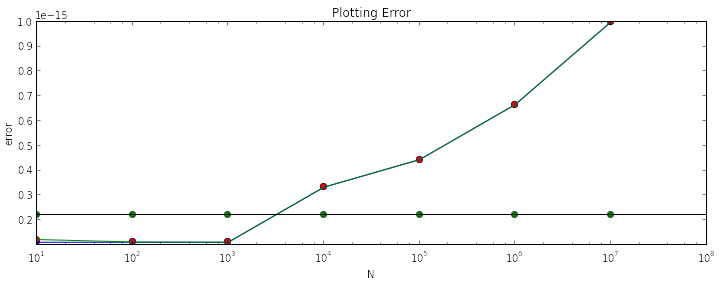

In [7]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

# HINT!  Use the plotting function semilogx to plot the errors
#        Also, do not forget to label your plot

# INSERT CODE HERE
axes = fig.add_subplot(1,1,1)
abs_list = []
rel_list = []
n_list = []
for x in xrange(1,8):
    n = 10**x
    n_list.append(n)
    err = abs_error(n)
    abs_list.append(err)
    rel_list.append(err / numpy.abs(sum_1(n)))
    abs_plot = axes.semilogx(n, err, 'bo')
    rel_plot = axes.semilogx(n, err / numpy.abs(sum_1(n)), 'ro')
    eps_plot = axes.semilogx(n, numpy.finfo(float).eps, 'go')
axes.semilogx(n_list, abs_list)
axes.semilogx(n_list, rel_list)
axes.set_xlabel('N')
axes.set_ylabel('error')
axes.set_title('Plotting Error')
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axes.set_xlim(0, 10**8)
plt.axhline(y = numpy.finfo(float).eps, xmin=0, xmax=10^8, linewidth=1, color = 'k')


plt.show()




**Comments**

We can see that the relative error and absolute error are superimposed. At small n, we can notice the discrepancy between absolute and realtive error but then, due to the series converging at 1, they end up being nearly equal. This seems to tell us that the sum above, converges to 1, without actually solving for this convergence. In addition, we can see that for larger N, out error gets increasingly larger which makes sense as we had seen how this type of error compunds in class excercises.

**(d)** (5) Theorize what may have lead to the differences in answers.

The difference in answers occurs due to floating point error. We are approximating real numbers with finite precision causing to get these different values in the summation. Moreover, the more arithmetic we perform, the more this floating point error compunds leading to serious discrepancies. Therefore, because of this finite precision, we need to be cognizant of truncation and floating point error.

For example, if we take the third term in the series, the first series has a fraction $\frac{1}{3} - \frac{1}{4}$ and the second sum has a fraction $\frac{1}{12}$. As we saw in the class, $\frac{1}{3}$ is a repeating decimal so due to our finite precision, we will have to truncate it causing us to get some error. Therefore, this trucncation and then calculation would account for the difference in answers between the two summations. 

## Question 3

Following our discussion in lecture regarding approximating $e^x$ again consider the Taylor polynomial approximation:

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

**(a)** Derive the upper bound on the *relative error* assuming that $x > 0$ and

$$R_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$R_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

**(a)** Deriving the upper bound:

$$ f(x) = T_N(x) + R_N(x)$$

$$R_N(x) = \frac{f^{(n+1)}(c) \cdot (x - x_0)^{n+1}}{(n+1)!}$$

$$R_N(x) = \frac{e^cx^{n+1}}{(n+1)!}$$

$$ R_N(x) = f(x) - T_N(x)$$

$$R_N(x) = e^x - T_N(x)$$

The Residual here appears exactly in our relative error equation:

$$R_n = \frac{|R_N(x)|}{|e^x|} =  \left | \frac{e^c}{e^x} \right | \left | \frac{x^{n+1}}{(n+1)!} \right |$$

We must choose a c that will maximize the error. With a choice from [0,x], we must choose x since the denominator is exponentially decreasing driving any other choice to 0.

Therefore:

$$R_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

**(b)** Show that for large $x$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need at least $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$.

**(b)** We know the following:

$$r_n \leq \epsilon_{\text{machine}}$$ and $$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$ 

Therefore, let

$$\left | \frac{x^{n+1}}{(n + 1)!} \right | \leq \epsilon_{\text{machine}}$$

$$log (x^{n+1}) - log (n+1!) \leq log(\epsilon_{\text{machine}})$$

By Stirling's Approximation:

$$(n+1)log (x) - [(n+1) log (n+1) - (n+1)] \leq log(\epsilon_{\text{machine}})$$

$$(n+1) [log(x)-log(n+1)+1] \leq log(\epsilon_{\text{machine}}) $$

$$log(x) + 1 \leq \frac{log(\epsilon_{\text{machine}})}{n+1} + log(n+1)$$

For large n, $\frac{log(\epsilon_{\text{machine}})}{n+1}$ will go to 0 and $log(n+1) \approx log(n)$:

$$log(n) > log(x) + 1 \rightarrow log(n) > log(e \cdot x)$$

$$n > e \cdot x$$

**(c)** Write a Python function that accurately computes $T_n$ to the specified relative error tolerance and returns both the estimate on the range and the number of terms in the series needed over the interval $[-2, 2]$.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$.

Make sure to document your code including expected inputs, outputs, and assumptions being made.

In [8]:
# HINT: Think about how we evaluated polynomials efficiently in class

'''Horners Method.

Expected inputs: x as an ndarray and tolerance for error

Outputs: 
    Taylor Approximations in the form of a list, showing all different calculations from varying x
    N - number of steps before tolerance reached.
'''

import scipy.misc as misc

def Tn_exp(x, tolerance=1e-3):
    """ Returns the Evaluated Taylor Polynomial given """
    MAX_N = 100
    N = MAX_N
    
    # INSERT CODE HERE
    """We are assuming x is an array here"""
    y = numpy.ones(x.shape) * (1.0/misc.factorial(MAX_N))
    
    """We go backwards in order to get our list of coefficients"""
    for n in xrange(MAX_N - 1, -1, -1):
        y = y * x + (1.0/misc.factorial(n))
        if numpy.all(numpy.abs(numpy.exp(1) - y) / y ) < tolerance:
            N = n
            break
    print N
    Tn = y
    return Tn, N

In [9]:
x = numpy.linspace(-2, 2, 100)
tolerance = 8.0 * numpy.finfo(float).eps
answer, N = Tn_exp(x, tolerance=tolerance)
assert(numpy.all(numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x)) < tolerance))
print "Success!"

100
Success!


## Question 4

Given the Taylor polynomial expansions

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + \mathcal{O}(\Delta x^4)$$

and

$$\cosh \Delta x = 1 - \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \mathcal{O}(\Delta x^6)$$

determine the order of approximation for their sum and product (determine the exponent that belongs in the $\mathcal{O}$).


**Solution**

We know the following:
   
$$f(\Delta x) = p(\Delta x) + O(\Delta x^n)$$
$$g(\Delta x) = q(\Delta x) + O(\Delta x^m)$$
$$r = \min(n, m)$$ 

$$f+g = p + q + O(\Delta x^r)$$

$$f \cdot g = p \cdot q + p \cdot O(\Delta x^m) + q \cdot O(\Delta x^n) + O(\Delta x^{n+m}) = p \cdot q + O(\Delta x^r)$$

In this case:

$$f(\Delta x) = \frac{1}{1-\Delta x} ~~~~~~ p(\Delta x) = 1 + \Delta x + \Delta x^2 + \Delta x^3$$

$$g(\Delta x) = \cosh \Delta x ~~~~~~ q(\Delta x) = 1 - \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!}$$

$$r = \min(n, m) = \min(4,6) = 4 \leftarrow Sol.$$

    f+g:
    
$$f + g = p + q + O(\Delta x^r)$$
$$= 1 + \Delta x + \Delta x^2 + \Delta x^3 + 1 - \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^4)$$ 
$$= 2 + \Delta x + \frac{\Delta x^2}{2} + \Delta x^3 + O(\Delta x^4)$$

    fg:

$$f \cdot g = p \cdot q + p \cdot O(\Delta x^m) + q \cdot O(\Delta x^n) + O(\Delta x^{n+m}) = p \cdot q + O(\Delta x^r)$$
$$(1 + \Delta x + \Delta x^2 + \Delta x^3) \cdot (1 - \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!}) + (1 + \Delta x + \Delta x^2 + \Delta x^3) \cdot (\mathcal{O}(\Delta x^6)) + (1 - \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!}) \cdot (\mathcal{O}(\Delta x^4)) + \mathcal{O}(\Delta x^{10}) $$
$$= (1 + \Delta x + \Delta x^2 + \Delta x^3) \cdot (1 - \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!}) + (\mathcal{O}(\Delta x^r)$$
$$r = \min(n, m) = \min(4,6) = 4 \leftarrow Sol.$$